In [1]:
import pandas as pd

from io import StringIO

In [2]:
import matplotlib as mpl

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter

In [4]:
import matplotlib

In [5]:
matplotlib.rc('font', size=20)

In [43]:
orig_text = """
                                            oof_accuracy                                                         test_accuracy                                                        
                                                    mean t_int_l t_int_h    std                           values          mean t_int_l t_int_h    std                           values
name                                                                                                                                                                                   
lgb_embeds:emb__hidden_size__hs_0064.pickle       0.5227  0.5205  0.5249 0.0018  [0.521 0.522 0.522 0.524 0.525]        0.5222  0.5208  0.5236 0.0011  [0.521 0.521 0.522 0.523 0.524]
lgb_embeds:emb__hidden_size__hs_0160.pickle       0.5334  0.5314  0.5353 0.0016  [0.532 0.532 0.534 0.534 0.535]        0.5309  0.5298  0.5320 0.0009  [0.530 0.530 0.531 0.532 0.532]
lgb_embeds:emb__hidden_size__hs_0480.pickle       0.5420  0.5400  0.5441 0.0016  [0.540 0.541 0.543 0.543 0.544]        0.5402  0.5386  0.5418 0.0013  [0.539 0.539 0.539 0.542 0.542]
lgb_embeds:emb__hidden_size__hs_0800.pickle       0.5425  0.5405  0.5444 0.0016  [0.541 0.541 0.543 0.544 0.544]        0.5423  0.5407  0.5439 0.0013  [0.541 0.541 0.542 0.543 0.544]
lgb_embeds:emb__hidden_size__hs_1600.pickle       0.5395  0.5379  0.5412 0.0013  [0.537 0.540 0.540 0.540 0.541]        0.5390  0.5371  0.5408 0.0015  [0.537 0.538 0.539 0.540 0.541]
"""

In [44]:
col_stats = ['mean', 't_int_l', 't_int_h', 'std'] + [f'{i}' for i in range(5)]

In [45]:
df = pd.read_fwf(StringIO(orig_text)).iloc[3:]
df.columns = ['name'] + [f'{k}.{n}' for k in ['valid', 'test'] for n in col_stats]

In [46]:
df = pd.concat([
    df['name'].str.extract(
        r'(?P<model_type>\w+):emb__hidden_size__hs_(?P<hidden_size>\d+)\.pickle'),
    df
], axis=1)

In [47]:
for col, dt in df.dtypes.iteritems():
    if col in ('name', 'model_type'):
        continue
    if dt == 'float':
        continue
    df[col] = pd.to_numeric(df[col].str.strip('[').str.strip(']'))

In [53]:
df2 = pd.melt(
    df,
    id_vars=['model_type', 'hidden_size', 'name'],
    var_name='fold_n',
    value_vars=[f'valid.{i}' for i in range(5)],
    value_name='Test accuracy',
)

In [54]:
df2

,model_type,hidden_size,name,fold_n,Test accuracy
0,lgb_embeds,64,lgb_embeds:emb__hidden_size__hs_0064.pickle,valid.0,0.521
1,lgb_embeds,160,lgb_embeds:emb__hidden_size__hs_0160.pickle,valid.0,0.532
2,lgb_embeds,480,lgb_embeds:emb__hidden_size__hs_0480.pickle,valid.0,0.540
3,lgb_embeds,800,lgb_embeds:emb__hidden_size__hs_0800.pickle,valid.0,0.541
4,lgb_embeds,1600,lgb_embeds:emb__hidden_size__hs_1600.pickle,valid.0,0.537
5,lgb_embeds,64,lgb_embeds:emb__hidden_size__hs_0064.pickle,valid.1,0.522
6,lgb_embeds,160,lgb_embeds:emb__hidden_size__hs_0160.pickle,valid.1,0.532
7,lgb_embeds,480,lgb_embeds:emb__hidden_size__hs_0480.pickle,valid.1,0.541
8,lgb_embeds,800,lgb_embeds:emb__hidden_size__hs_0800.pickle,valid.1,0.541
9,lgb_embeds,1600,lgb_embeds:emb__hidden_size__hs_1600.pickle,valid.1,0.540


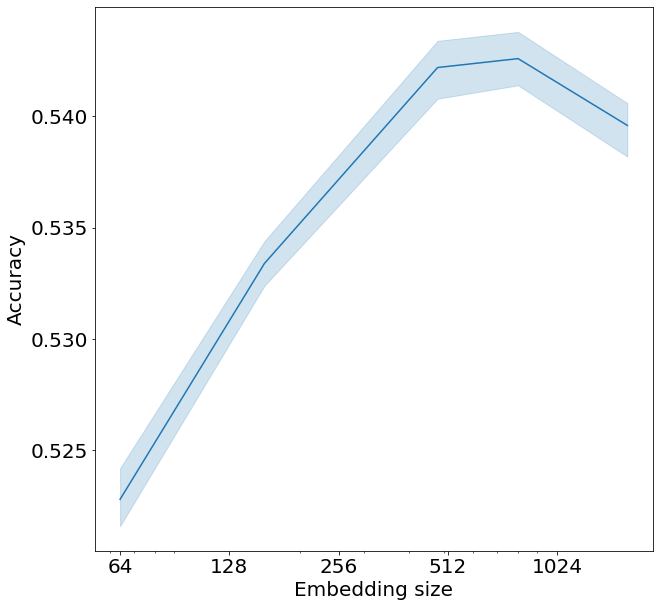

In [56]:
with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    
    ax = sns.lineplot(
        x='Embedding size',
        y='Accuracy',
        palette='tab10',
        data=df2[lambda x: x['model_type'].eq('lgb_embeds')]
        .rename(columns={'hidden_size': 'Embedding size', 'Test accuracy': 'Accuracy'}),
        ci=95,
    )
    
    ax.set_xlabel('Embedding size')
    ax.set_xscale('log')

    # ax.set(ylim=(0.74, 0.89))
    ax.set_facecolor('white')

    x_ticks = [2 ** i for i in range(6, 11)]
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('x5-hidden-size.pdf', format='pdf', bbox_inches='tight')
    
# plt.title('Age prediction task')
# ax.set_xscale('log'),
# ax.set_xticks([2 ** i for i in range(5, 12)])
# ax.get_xaxis().set_major_formatter(ScalarFormatter())

# # plt.axhline(df['valid.mean'].quantile(0.99), color='black', linestyle='--', linewidth=1)
# # plt.axhspan(0.6285, 0.6387, alpha=0.1, color='black')
# # plt.grid()
# # plt.legend(loc='lower right')
# # plt.show()

# plt.savefig('age-pred-hidden-size.pdf', format='pdf', bbox_inches='tight')